# 교차검증의 의미

ML에서도 test와 train을 나누어 학습, 훈력과 테스트를 통해 성능을 측정했다. \
test에서 test set, validation set으로 나누어 분히하여 교차검증을 진행했다. \
1. test set으로만 학습, 훈련을 거친다면 overfitting이 일어날 수 밖에 없다.
2. 즉, test set에서만 성능이 잘나오는 분석 모델에서 멈추게 된다.
3. 과적합을 피하며 훈련하는 것은 당연히 generalization을 올리기 위함이다.
4. 이를 해결하고자 cross validattion을 통해 test set에서 일정비율의 부분을 잘라서 데이터의 편중을 막고, 여러반 반복된 학습을 통해 학습을 높이는 방법이다.

## K-fold cross validation

가장 일반적이니 교차검증 방법으로 \
모든 데이터 셋을 평가와 검증을 할 수 있다. \
데이터가 부족한 underfiting을 방지할 수 있다. \
train을 반복할 때 마다 최적으러 향하는 parameter을 조절할 수 있다.\
\
단, 계산시간이 오래 걸린다는 단점이 있다.

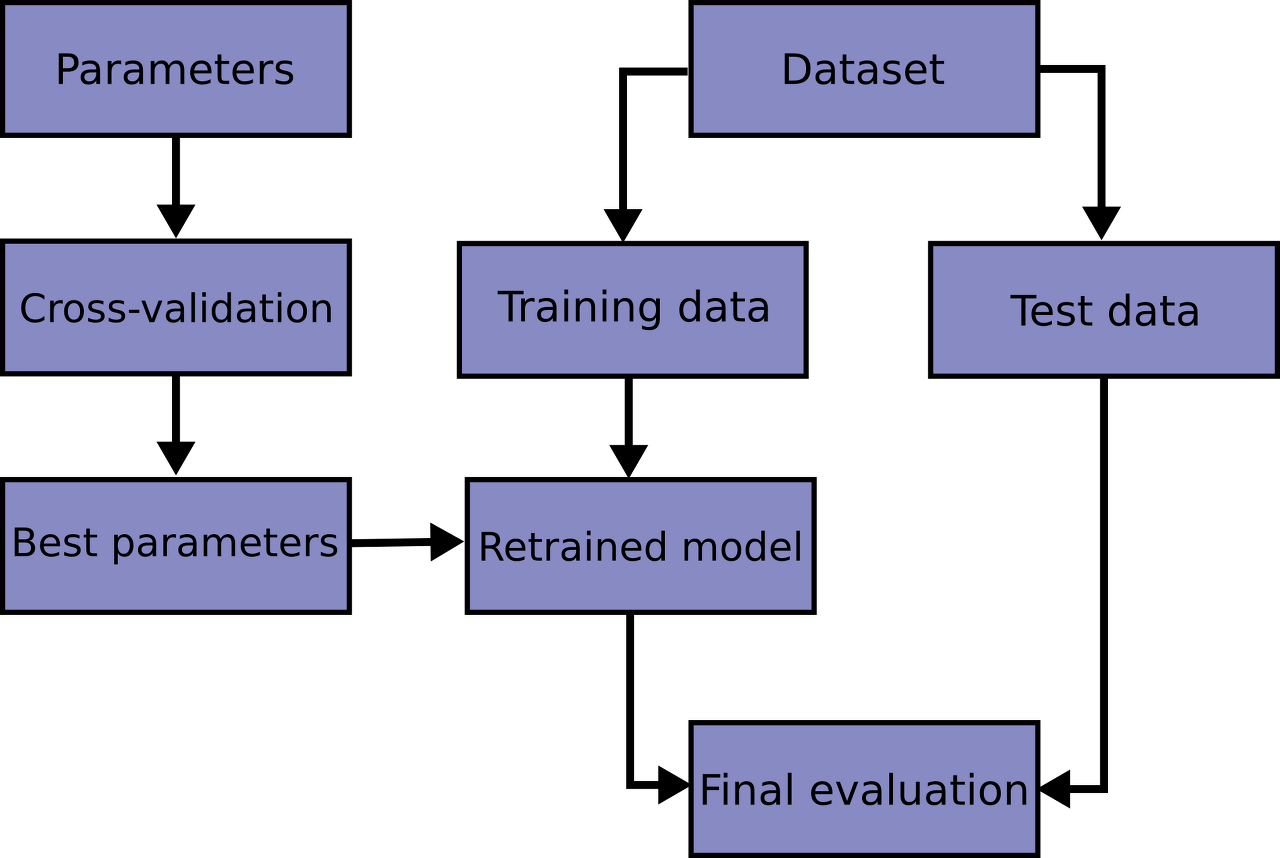

## stratified K-fold cross validation

1. classification에서 imbalanced 한 상황에서 사용된다. \
(즉, 어떤 데이터에서 특정 feature에 데이터가 평향되어있을 수 있다.)
2. 데이터 class 별 양에 딸라 일정 비율을 추출해 split 해준다.\
(class별 균등하게)
3. classification 문제에 사용된다.

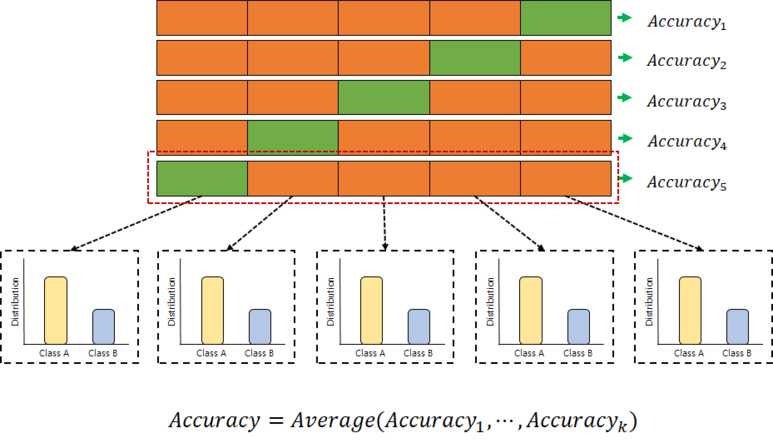

# cross validation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

raw_x = np.concatenate((raw_train_x, raw_test_x), axis=0)
raw_y = np.concatenate((raw_train_y, raw_test_y), axis=0)

x = raw_x/255.
y = raw_y/255.

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
def build_model():  
  model = keras.Sequential()
  model.add(Input((28,28)))
  model.add(Reshape((28,28,1))) # ADDED
  model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED
  model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
  model.add(MaxPooling2D((2, 2))) # ADDED
  model.add(Flatten())
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

  return model

In [ ]:
fold_count = 4

In [ ]:
from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold

kfold = KFold(n_splits=fold_count, shuffle=True)
# skf = StratifiedKFold(n_split=fold_count, shffle=True)
# skf를 사용하려면 대신 labeling이 필요하다.

losses = []
acces = []

for train, test in kfold.split(x, y):

  model = build_model()
  # 중요!!! 모델을 계속 새롭게 적용해줘야 한다.
  # 그렇지 않으면 n이 반복되면서 train이 쌓이면서 학습된다.

  history = model.fit(x[train], y[train], batch_size=32, epochs=2, validation_split=0.2)

  loss, acc = model.evaluate(x[test], y[test])
  print("loss =", loss)
  print("acc =", acc)
  losses.append(loss)
  acces.append(acc)


Epoch 1/2
1313/1313 [==============================] - 13s 4ms/step - loss: 0.0069 - accuracy: 0.0977 - val_loss: 4.2336e-08 - val_accuracy: 0.0979
Epoch 2/2
547/547 [==============================] - 1s 2ms/step - loss: 3.5756e-08 - accuracy: 0.1010
loss = 3.575590667992401e-08
acc = 0.10097143054008484
Epoch 1/2
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0159 - accuracy: 0.0990 - val_loss: 6.0450e-06 - val_accuracy: 0.0966
Epoch 2/2
547/547 [==============================] - 1s 2ms/step - loss: 1.5325e-06 - accuracy: 0.0974
loss = 1.5324787909776205e-06
acc = 0.0974285677075386
Epoch 1/2
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0156 - accuracy: 0.0986 - val_loss: 3.6882e-06 - val_accuracy: 0.0993
Epoch 2/2
547/547 [==============================] - 1s 2ms/step - loss: 1.2730e-06 - accuracy: 0.0979
loss = 1.2729785794363124e-06
acc = 0.09788571298122406
Epoch 1/2
1313/1313 [==============================] - 6s 4ms/step - loss: 0.1928 -

In [ ]:
average_acc = sum(acces) / fold_count
print("average acc=", average_acc)

average acc= 0.0986142847687006


In [ ]:
ex=x[:100]
ey=y[:100]
fold_count = 2

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=fold_count, shuffle=True)

losses = []
acces = []

for train, test in kfold.split(ex, ey):

  model = build_model()

  history = model.fit(x[train], y[train], batch_size=32, epochs=5, validation_split=0.2)

  loss, acc = model.evaluate(x[test], y[test])
  print("loss =", loss)
  print("acc =", acc)
  losses.append(loss)
  acces.append(acc)
